In [1]:
import pandas as pd
import html
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r'C:\Users\sowmy\Desktop\Technocolabs\Datasets\TwitterData\APPL.csv')
df

,Datetime,Text
0,2020-06-29 22:56:32+00:00,"#GBPAUD 145 PIPS Profit🔥🔥\n\nFor free signals,..."
1,2020-06-29 22:20:05+00:00,APPLE ANALYSIS 15 MIN (BUY S...
2,2020-06-29 21:35:23+00:00,EURNZD TP2 Hit! 180 PIPS PROFIT 🔥👍🏻⚡️\n\nFor F...
3,2020-06-29 21:17:03+00:00,"Apple Inc price at close, 2020-06-29, is 361.7..."
4,2020-06-29 20:40:54+00:00,#NZDCAD Target Hit! 90 PIPS Profit 🔥\n\nChecko...
...,...,...
33363,2021-01-01 12:55:44+00:00,@NiemotkaMike @TraderNickyBAT Gains: #AAPL and...
33364,2021-01-01 06:58:35+00:00,Not all flowers were bloom together. If not #s...
33365,2021-01-01 05:40:03+00:00,Ending this year with small Boom .. #BABA #AAP...
33366,2021-01-01 05:05:52+00:00,"If you #trade #stocks like #FB, #AAPL, #AMZN, ..."


In [3]:
APPL_clean = df.drop_duplicates('Text',keep='first') #delete the duplicates by dropping them and store the result value to a new variable
APPL_clean.Text = APPL_clean.Text.str.lower() #convert text to lower case
APPL_clean.Text = APPL_clean.Text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])  #remove urls
APPL_clean.Text = APPL_clean.Text.apply(lambda x: re.sub(r'@\w+', '', str(x)))   #remove mentions
APPL_clean.Text = APPL_clean.Text.apply(lambda x: re.sub(r'&[a-z]+;', '', str(x))) #remove html characters
APPL_clean.Text = APPL_clean.Text.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

def getSubjectivity(APPL_clean):
    return TextBlob(APPL_clean).sentiment.subjectivity

def getPolarity(APPL_clean):
    return TextBlob(APPL_clean).sentiment.polarity


def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"    

APPL_clean['Subjectivity'] = APPL_clean['Text'].apply(getSubjectivity)
APPL_clean['Polarity'] = APPL_clean['Text'].apply(getPolarity)
APPL_clean["Score"] = APPL_clean['Polarity'].apply(getTextAnalysis)
APPL_clean

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-3-d624dfeb9faf>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  APPL_clean['Subjectivity'] = APPL_clean['Text'].apply(getSubjectivity)
<ipython-input-3-d624dfeb9faf>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Datetime,Text,Subjectivity,Polarity,Score
0,2020-06-29 22:56:32+00:00,gbpaud 145 pips profit\n\nfor free signals join,0.80,0.400,Positive
1,2020-06-29 22:20:05+00:00,apple analysis 15 min buy si...,0.00,0.000,Neutral
2,2020-06-29 21:35:23+00:00,eurnzd tp2 hit 180 pips profit \n\nfor forex s...,0.00,0.000,Neutral
3,2020-06-29 21:17:03+00:00,apple inc price at close 20200629 is 36178 app...,0.00,0.000,Neutral
4,2020-06-29 20:40:54+00:00,nzdcad target hit 90 pips profit \n\ncheckout ...,0.50,0.500,Positive
...,...,...,...,...,...
33363,2021-01-01 12:55:44+00:00,gains aapl and pltr losses amd and sfix,0.00,0.000,Neutral
33364,2021-01-01 06:58:35+00:00,not all flowers were bloom together if not suc...,0.95,-0.375,Negative
33365,2021-01-01 05:40:03+00:00,ending this year with small boom baba aapl nf...,0.40,-0.250,Negative
33366,2021-01-01 05:05:52+00:00,if you trade stocks like fb aapl amzn amd goog...,0.80,0.400,Positive


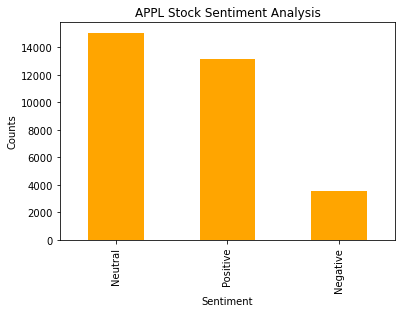

In [6]:
APPL_clean['Score'].value_counts()

plt.title('APPL Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
APPL_clean['Score'].value_counts().plot(kind = 'bar', color='orange')
plt.show()

<ipython-input-7-23235866ea4e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  APPL_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],


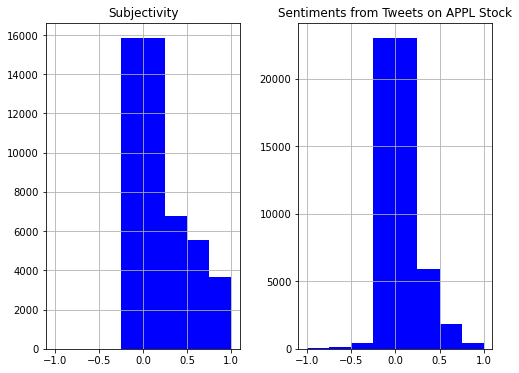

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
APPL_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on APPL Stock")
plt.show()

In [4]:
segment = pd.get_dummies(APPL_clean['Score'])
segment

,Negative,Neutral,Positive
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
33363,0,1,0
33364,1,0,0
33365,1,0,0
33366,0,0,1


In [5]:
joined_df = pd.concat([APPL_clean, segment], axis = 1)
joined_df['Datetime'] = pd.to_datetime(joined_df.Datetime, errors='coerce',format='%Y/%m/%d %H:%M:%S.%f')

In [6]:
datetime_list = joined_df["Datetime"].tolist()
df1 = joined_df.groupby([joined_df['Datetime'].dt.date]).sum()
#df2 = df1.drop(['Subjectivity','Polarity'],axis=1)
df1.reset_index(inplace=True)
df1

,Datetime,Subjectivity,Polarity,Negative,Neutral,Positive
0,2020-01-01,8.463745,3.601385,2.0,6.0,10.0
1,2020-01-02,29.885676,6.833576,11.0,31.0,40.0
2,2020-01-03,16.020013,3.718863,9.0,12.0,22.0
3,2020-01-04,2.215873,0.943651,1.0,8.0,3.0
4,2020-01-05,4.452778,0.446528,1.0,9.0,4.0
...,...,...,...,...,...,...
622,2021-09-16,12.685741,5.532809,6.0,14.0,19.0
623,2021-09-17,10.258369,0.237626,8.0,13.0,10.0
624,2021-09-18,5.908081,2.206313,3.0,6.0,12.0
625,2021-09-19,8.702245,2.544349,4.0,9.0,11.0


In [8]:
col_list = list(df1)
col_list.remove('Datetime')
df1['Total_Tweets'] = df1[col_list].sum(axis=1)
df1['Datetime']=pd.to_datetime(df1.Datetime, format='%Y/%m/%d %H:%M:%S.%f')
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Day'] = df1['Datetime'].dt.day
df1


,Datetime,Subjectivity,Polarity,Negative,Neutral,Positive,Total_Tweets,Year,Month,Day
0,2020-01-01,8.463745,3.601385,2.0,6.0,10.0,30.065130,2020,1,1
1,2020-01-02,29.885676,6.833576,11.0,31.0,40.0,118.719252,2020,1,2
2,2020-01-03,16.020013,3.718863,9.0,12.0,22.0,62.738876,2020,1,3
3,2020-01-04,2.215873,0.943651,1.0,8.0,3.0,15.159524,2020,1,4
4,2020-01-05,4.452778,0.446528,1.0,9.0,4.0,18.899306,2020,1,5
...,...,...,...,...,...,...,...,...,...,...
622,2021-09-16,12.685741,5.532809,6.0,14.0,19.0,57.218550,2021,9,16
623,2021-09-17,10.258369,0.237626,8.0,13.0,10.0,41.495996,2021,9,17
624,2021-09-18,5.908081,2.206313,3.0,6.0,12.0,29.114394,2021,9,18
625,2021-09-19,8.702245,2.544349,4.0,9.0,11.0,35.246595,2021,9,19


In [13]:
df1.to_csv('EDA_APPL.csv', index=False)

In [9]:
df3 = pd.read_csv('C:/Users/sowmy/Desktop/Technocolabs/Datasets/FinancialData/APPL.csv')

In [10]:
df3['Date'] = pd.to_datetime(df3['Date']).apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
df1.rename(columns = {'Datetime':'Date'}, inplace = True)
df1.Date

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
622   2021-09-16
623   2021-09-17
624   2021-09-18
625   2021-09-19
626   2021-09-20
Name: Date, Length: 627, dtype: datetime64[ns]

In [11]:
df3['Date'] = pd.to_datetime(df3.Date, errors='coerce',format='%Y/%m/%d')
df3.rename(columns = {'Close/Last':'Close'}, inplace = True)

In [12]:
# Merge the two dataframes, using _ID column as key
merge_left = pd.merge(df1, df3, on = 'Date', how='left')
merge_left.set_index('Date', inplace = True)
# Write it to a new CSV file
#df3.to_csv('CSV3.csv')

In [13]:
merge_left.reset_index(inplace=True)
merge_left

,Date,Subjectivity,Polarity,Negative,Neutral,Positive,Total_Tweets,Year,Month,Day,Close,Volume,Open,High,Low
0,2020-01-01,8.463745,3.601385,2.0,6.0,10.0,30.065130,2020,1,1,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,29.885676,6.833576,11.0,31.0,40.0,118.719252,2020,1,2,$75.0875,135647440.0,$74.06,$75.15,$73.7975
2,2020-01-03,16.020013,3.718863,9.0,12.0,22.0,62.738876,2020,1,3,$74.3575,146535520.0,$74.2875,$75.145,$74.125
3,2020-01-04,2.215873,0.943651,1.0,8.0,3.0,15.159524,2020,1,4,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,4.452778,0.446528,1.0,9.0,4.0,18.899306,2020,1,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2021-09-16,12.685741,5.532809,6.0,14.0,19.0,57.218550,2021,9,16,$148.79,68034150.0,$148.44,$148.97,$147.221
623,2021-09-17,10.258369,0.237626,8.0,13.0,10.0,41.495996,2021,9,17,$146.06,129868800.0,$148.82,$148.82,$145.76
624,2021-09-18,5.908081,2.206313,3.0,6.0,12.0,29.114394,2021,9,18,NaN,NaN,NaN,NaN,NaN
625,2021-09-19,8.702245,2.544349,4.0,9.0,11.0,35.246595,2021,9,19,NaN,NaN,NaN,NaN,NaN


In [15]:
merge_left['Close'] = merge_left['Close'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['Open'] = merge_left['Open'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['Low'] = merge_left['Low'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['High'] = merge_left['High'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['dayOfWeek'] = merge_left['Date'].dt.day_name()
merge_2 = merge_left.sort_index(ascending=True)

#Add stock name column = APPL
merge_2['Stock name']= 'AAPL'
colum_names = ['Stock name','Date','Year','Month','Day','dayOfWeek','Close','Open','High','Low','Volume','Subjectivity','Polarity','Positive','Negative','Neutral','Total_Tweets']
merge_3 = merge_2.reindex(columns=colum_names)
merge_3['Close'] = merge_3['Close'].astype(float)
merge_3['Open'] = merge_3['Open'].astype(float)
merge_3['High'] = merge_3['High'].astype(float)
merge_3['Low'] = merge_3['Low'].astype(float)
merge_4 = merge_3.interpolate(method = 'linear', limit_direction='backward')
merge_4

,Stock name,Date,Year,Month,Day,dayOfWeek,Close,Open,High,Low,Volume,Subjectivity,Polarity,Positive,Negative,Neutral,Total_Tweets
0,AAPL,2020-01-01,2020,1,1,Wednesday,75.0875,74.060000,75.150000,73.797500,1.356474e+08,8.463745,3.601385,10.0,2.0,6.0,30.065130
1,AAPL,2020-01-02,2020,1,2,Thursday,75.0875,74.060000,75.150000,73.797500,1.356474e+08,29.885676,6.833576,40.0,11.0,31.0,118.719252
2,AAPL,2020-01-03,2020,1,3,Friday,74.3575,74.287500,75.145000,74.125000,1.465355e+08,16.020013,3.718863,22.0,9.0,12.0,62.738876
3,AAPL,2020-01-04,2020,1,4,Saturday,74.5550,74.007500,75.093333,73.812500,1.372165e+08,2.215873,0.943651,3.0,1.0,8.0,15.159524
4,AAPL,2020-01-05,2020,1,5,Sunday,74.7525,73.727500,75.041667,73.500000,1.278975e+08,4.452778,0.446528,4.0,1.0,9.0,18.899306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,AAPL,2021-09-16,2021,9,16,Thursday,148.7900,148.440000,148.970000,147.221000,6.803415e+07,12.685741,5.532809,19.0,6.0,14.0,57.218550
623,AAPL,2021-09-17,2021,9,17,Friday,146.0600,148.820000,148.820000,145.760000,1.298688e+08,10.258369,0.237626,10.0,8.0,13.0,41.495996
624,AAPL,2021-09-18,2021,9,18,Saturday,145.0200,147.146667,147.493333,144.263333,1.277388e+08,5.908081,2.206313,12.0,3.0,6.0,29.114394
625,AAPL,2021-09-19,2021,9,19,Sunday,143.9800,145.473333,146.166667,142.766667,1.256089e+08,8.702245,2.544349,11.0,4.0,9.0,35.246595


In [16]:
merge_4.to_csv('APPL_combined_POL.csv')

In [17]:
merge_4.dtypes

Stock name              object
Date            datetime64[ns]
Year                     int64
Month                    int64
Day                      int64
dayOfWeek               object
Close                  float64
Open                   float64
High                   float64
Low                    float64
Volume                 float64
Subjectivity           float64
Polarity               float64
Positive               float64
Negative               float64
Neutral                float64
Total_Tweets           float64
dtype: object